In [26]:
import os
os.chdir('/home/rwb/github/thesis_experiments')
import os
import sys
import logging
import time
import simpy

import pandas as pd

sys.path.insert(0, os.path.abspath('../../thesis_experiments'))
sys.path.insert(0, os.path.abspath('../../topsim_pipelines'))

global_sim = pd.read_pickle('hopefully_final_scheduling_update.pkl')

In [91]:
df = global_sim.groupby(['planning','delay', 'config']).size().astype(float).reset_index(name='time').sort_values(by=['planning'])
df['config'] = df['config'].str.replace('visualisation_playground/sim_config/single_size/40cluster/mos_sw','').str.strip('.json').astype(float)
config = 'visualisation_playground/sim_config/single_size/40cluster/mos_sw40.json'
# global_sim[(global_sim['config']==config) & (global_sim['planning']=='heft')]['finished_tasks']
# global_sim[(global_sim['config']==config) & (global_sim['planning']=='fcfs')]['finished_tasks']
basetime = pd.Series(df[df['planning'] == 'fcfs']['time'])
basetime = basetime.append(basetime,ignore_index=True)
df

,planning,delay,config,time
0,fcfs,0,10.0,874.0
1,fcfs,0,20.0,975.0
2,fcfs,0,40.0,1720.0
3,fcfs,0,60.0,2330.0
4,fcfs,0,80.0,2967.0
5,heft,0,10.0,874.0
6,heft,0,20.0,953.0
7,heft,0,40.0,1563.0
8,heft,0,60.0,2199.0
9,heft,0,80.0,2829.0


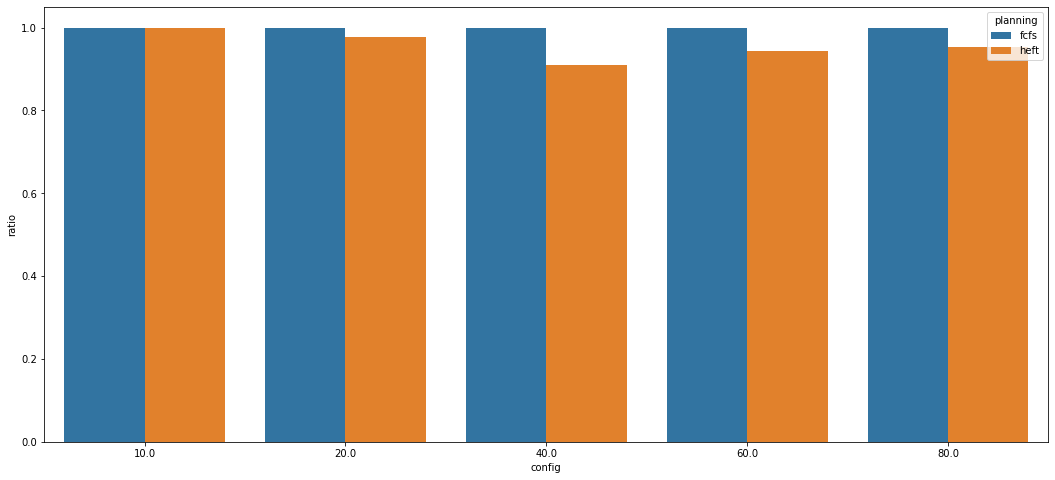

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
# g = sns.FacetGrid(df, col='delay',height=8, aspect=0.5)
plt.figure(figsize=(18,8))

sns.barplot(data=df,x='config', y='ratio', hue='planning')

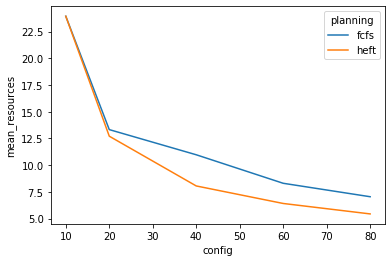

In [128]:
# plot=global_sim[global_sim['config']==config]
# # plot
# plt.figure(figsize=(18,8))
# sns.lineplot(data=plot,x=plot.index, y='available_resources',hue='planning')
df = global_sim.groupby(['planning','delay', 'config']).size().astype(float).reset_index(name='time').sort_values(by=['planning'])
df = global_sim.groupby(['planning','delay', 'config'])['available_resources'].mean().astype(float).reset_index(name='mean_resources').sort_values(by=['planning'])
df['config'] = df['config'].str.replace('visualisation_playground/sim_config/single_size/40cluster/mos_sw','').str.strip('.json').astype(float)
sns.lineplot(data=df,x='config', y='mean_resources',hue='planning')
# df